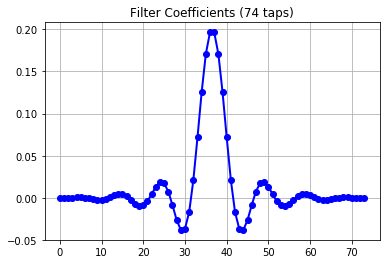

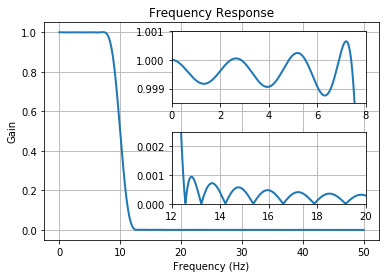

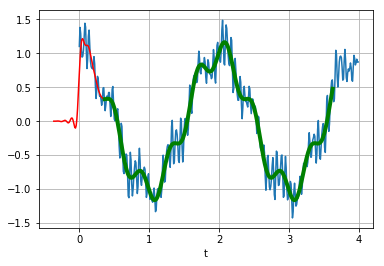

In [2]:
#!python

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

In [4]:
delay

0.365

In [6]:
import numpy as np

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08

b, a = signal.butter(3, 0.05)

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [8]:
y = signal.filtfilt(b, a, xn)

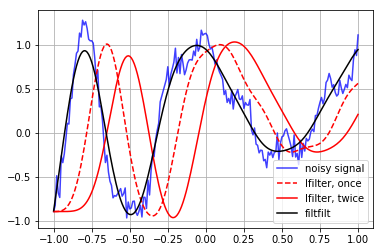

In [9]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [16]:
x2.shape

(441, 50)

In [255]:
from utils.Logger import  IO

rlt = IO('RewardDuty/fitness5_param.pkl').read_pickle()
(rewards, commands, v_e) = rlt


In [134]:
vx_e = v_e[:,1]

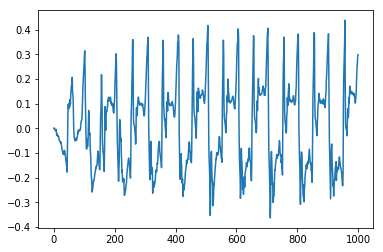

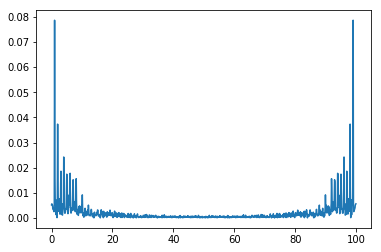

In [135]:
plt.plot(vx_e)
x = vx_e


Fs = 100.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长

 

n = x.shape[0]                 # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(x)          # 未归一化
Y = np.fft.fft(x)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

plt.figure()
plt.plot(frq, abs(Y))

fn = 50Hz, Wn = 0.40rad/s


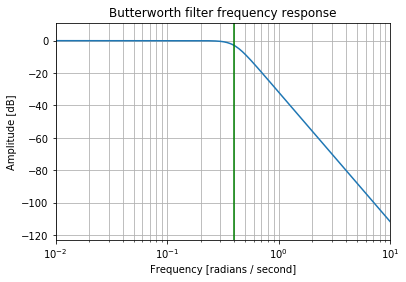

In [136]:
N = 4   # order of the filter
fn = 50 
Wn = 20/(100/2)    # 截止频率

print('fn = {}Hz, Wn = {:.2f}rad/s'.format(fn, Wn))
b, a = signal.butter(N, Wn, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # cutoff frequency
plt.show()

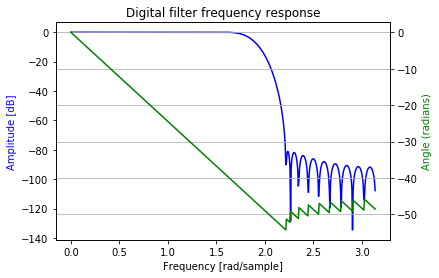

In [137]:
numtaps = 50
B = 30
fs = 100
f = B/(fs/2)

#b = signal.firwin(numtaps, f)
b = signal.firwin(numtaps, f, window=('kaiser', 8))
w,h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
 
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
 
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

In [138]:
a=[1]
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, x, zi=zi*x[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*x[0])

y = signal.filtfilt(b, a, x)

In [139]:
z.shape

(1000,)

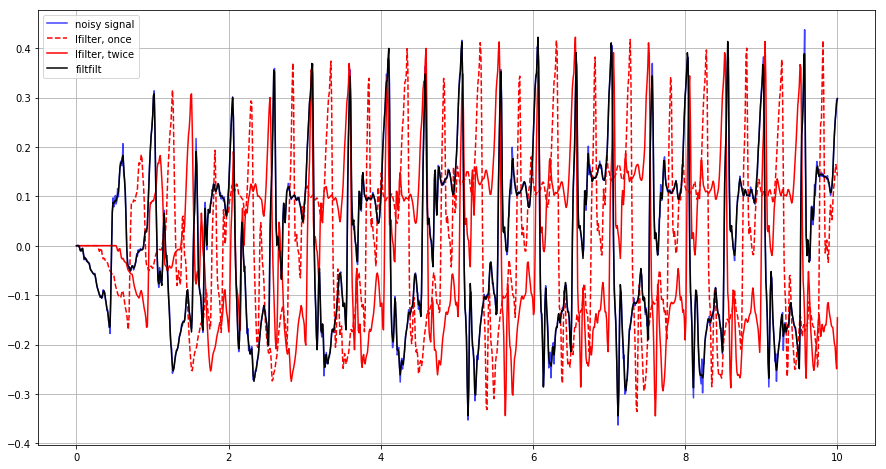

In [140]:
plt.figure(figsize=(15,8))
t = np.linspace(0, 10, 1000)
plt.plot(t, x, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

[0.00022312]


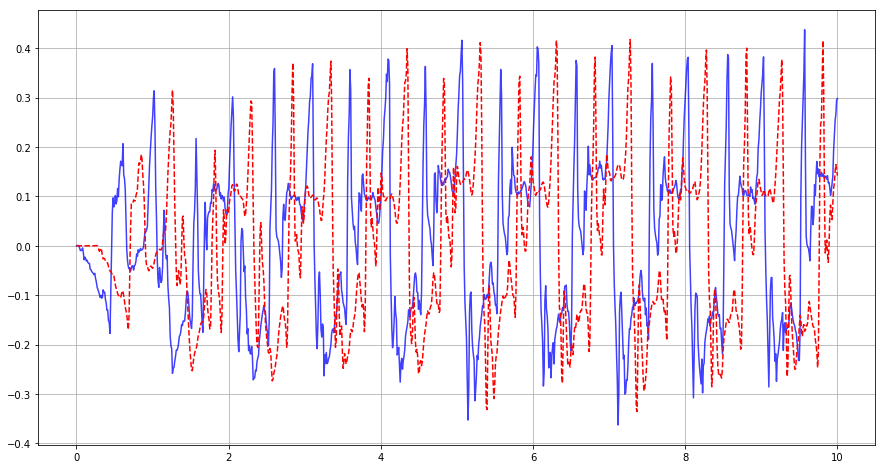

In [141]:
x_pre = []
max_step = 1000

zi = signal.lfilter_zi(b, a)

obs = 0
x_pre = [obs]
obs_f, _=  signal.lfilter(b, a, np.array(x_pre), zi=zi*x[0])
print(obs_f)

x_f = [] 

for i in range(max_step):
    #print(i , x_pre)
    obs = x[i]
    
    x_pre.append(obs)
    
    obs_f  =  signal.lfilter(b, a, np.array(x_pre)  )
    
    x_f.append(obs_f[-1])
    
    
    if len(x_pre) == numtaps:
        del x_pre[0]
    
x_f = np.array(x_f)
plt.figure(figsize=(15,8))
t = np.linspace(0, 10, 1000)
plt.plot(t, x, 'b', alpha=0.75)
plt.plot(t, x_f, 'r--' )
 
plt.grid(True)
plt.show() 
    

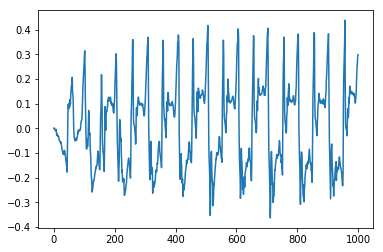

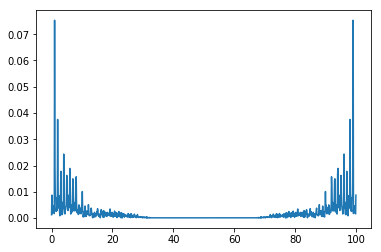

In [142]:
plt.plot(vx_e)
x = x_f


Fs = 100.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长

 

n = x.shape[0]                 # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(x)          # 未归一化
Y = np.fft.fft(x)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

plt.figure()
plt.plot(frq, abs(Y))

In [143]:
signal.lfilter_zi(b, a)

array([ 9.99975417e-01,  9.99948478e-01,  1.00013337e+00,  1.00002836e+00,
        9.99565804e-01,  1.00029741e+00,  1.00071925e+00,  9.98733094e-01,
        9.99599604e-01,  1.00272313e+00,  9.98512317e-01,  9.96382514e-01,
        1.00537229e+00,  1.00179396e+00,  9.89847225e-01,  1.00496955e+00,
        1.01224832e+00,  9.82595207e-01,  9.94173026e-01,  1.03286171e+00,
        9.82471582e-01,  9.56443311e-01,  1.07889037e+00,  1.01422945e+00,
        5.00000000e-01, -1.42294543e-02, -7.88903716e-02,  4.35566893e-02,
        1.75284184e-02, -3.28617100e-02,  5.82697390e-03,  1.74047925e-02,
       -1.22483228e-02, -4.96954746e-03,  1.01527750e-02, -1.79395842e-03,
       -5.37229201e-03,  3.61748563e-03,  1.48768345e-03, -2.72312874e-03,
        4.00396104e-04,  1.26690611e-03, -7.19252684e-04, -2.97405903e-04,
        4.34196024e-04, -2.83602558e-05, -1.33367495e-04,  5.15218183e-05,
        2.45830831e-05])

In [78]:
2 ** np.arange(2, 14)

array([   4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048, 4096,
       8192])

In [80]:
signal.lfilter_zi(b, a).shape

(79,)

In [144]:
def FFT(x, fs):
    Fs = fs;                 # sampling rate采样率
    Ts = 1.0/Fs;                # sampling interval 采样区间
    t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长



    n = x.shape[0]                 # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T                   # two sides frequency range
    frq1 = frq[range(int(n/2))] # one side frequency range

    YY = np.fft.fft(x)          # 未归一化
    Y = np.fft.fft(x)/n         # fft computing and normalization 归一化
    Y1 = Y[range(int(n/2))]

    plt.figure()
    plt.plot(frq, abs(Y))
    
def fir_lowpassfilter(x, B, numtasps, fs):
#     numtaps = 50
#     B = 30
#     fs = fs
    f = B/(fs/2)

    #b = signal.firwin(numtaps, f)
    b = signal.firwin(numtaps, f, window=('kaiser', 8))
    w,h = signal.freqz(b)

    fig, ax1 = plt.subplots()
    ax1.set_title('Digital filter frequency response')

    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [rad/sample]')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')
    plt.show()
    
    a= [1]
    y = signal.filtfilt(b, a, x)
    
    
    return y



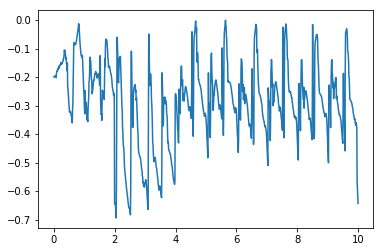

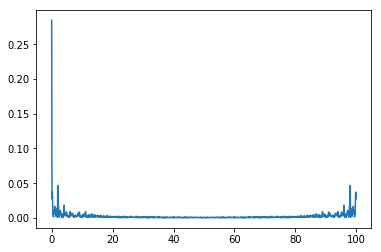

In [256]:
sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
        
t = arange(0, 10, 0.01)         
x = rewards[:, 0]
plot(t,x)
FFT(x,sample_rate )

In [257]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 10.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
print('N = ', N)
# The cutoff frequency of the filter.
cutoff_hz = 20.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

N =  4


0.015


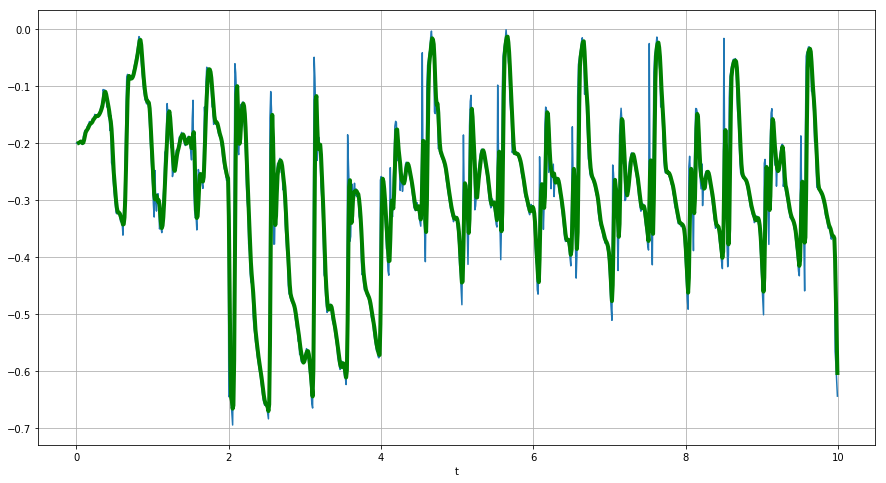

In [258]:
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate
print(delay)
figure(figsize=(15,8))
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(t-delay , filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:], filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

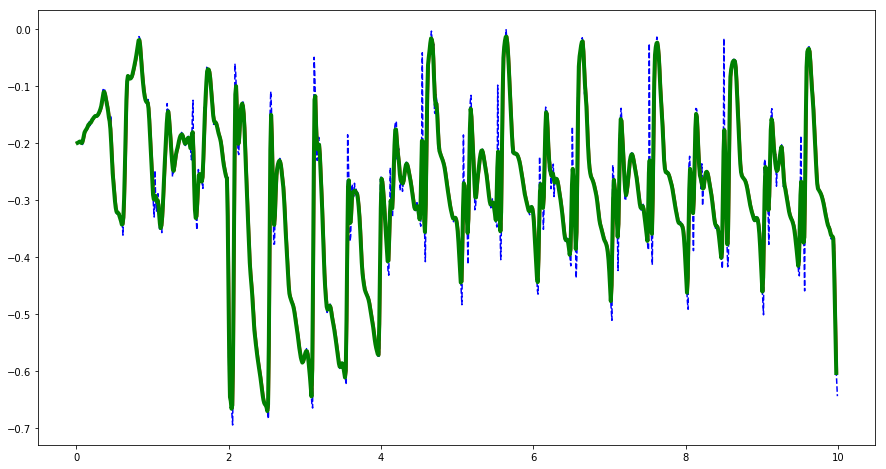

In [260]:
zi = signal.lfilter_zi(taps, 1.0 ) 
T = 1000
x_buffer = []
filter_x_list= []
for i in range(T):
    state = x[i]
    x_buffer.append(state)
    if i <N-1:
         
        filter_x = state
    else:
        #y, _ = signal.lfilter(taps, 1.0, np.array(x_buffer), zi = zi *x_buffer[0])
        y, _ = signal.lfilter(taps, 1.0, np.array(x_buffer), zi = zi *x_buffer[0])
        
        filter_x = y[-1]
    
    filter_x_list.append(filter_x)
    
    if len(x_buffer)>N:
        del x_buffer[0]
        #print('test')

filter_x_list = np.array(filter_x_list)
figure(figsize=(15,8))
len(x_buffer)
plot(t, x[:T], 'b--')
#plot(y)
plot(t, filter_x_list, 'r')
plot(t[N-1:]-delay, filter_x_list[N-1:], 'g', linewidth=4)

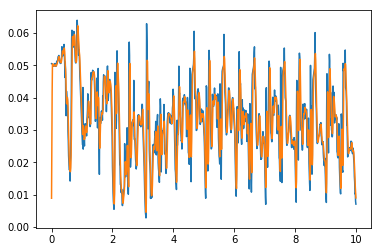

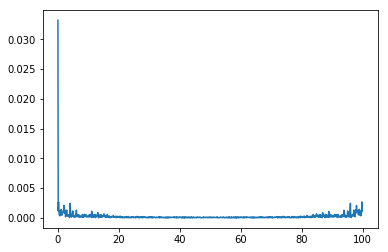

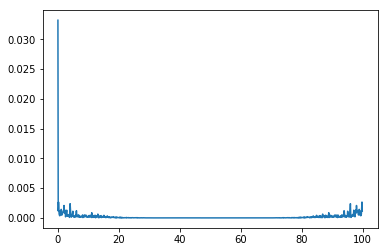

In [254]:

plot(t,x)
plot(t,filtered_x )
FFT(x,sample_rate )
FFT(filtered_x,sample_rate )

In [169]:
N

74